In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
# use seaborn plotting defaults
import seaborn as sns; sns.set()
from scipy.io import loadmat

In [3]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=100, centers=4,random_state=0, cluster_std=0.4)


make blobs for clustering using make_blobs from samples_generator

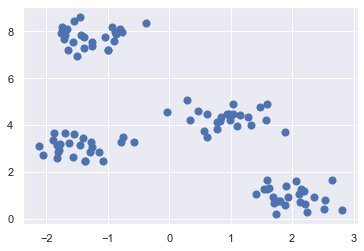

In [4]:
plt.scatter(X[:, 0], X[:, 1], s=50, cmap='spring');

In [5]:
def distance(x,y):
    dis = np.sqrt((x[:,0]-y[0])**2 + (x[:,1]-y[1])**2)
    return dis

defining a distance function to calculate distance of the (random) centroid from all the samples

In [6]:
def clusterassignment(x,means):
    diff =np.empty((means.shape[0],x.shape[0]))
    for mean,i in zip(means,range(len(means))):
        diff[i] = (distance(x,mean))
    mini=(np.argmin(diff,axis = 0))
    return mini


defining a cluster assignment function to assign samples to K clusters based on the distance of each sample from the nearest centroid 


In [7]:
def kmean(allx,k,num_iters=100):
    mean=[]
    clsuter = []
    cost_ = []
    c=[]
    
    for i  in range(num_iters):
        means = allx[np.random.choice(allx.shape[0], k, replace=False), :]
        c = np.array(clusterassignment(allx,means))
        for i in range(k):
            index_ = np.where(c==i)
            means[i] = np.sum(allx[index_],axis=0) / len(allx[index_])

        j = np.sum(np.apply_along_axis(np.linalg.norm, 1, (allx - means[c.astype(int),:]))**2)
        mean.append(means)
        clsuter.append(c)
        cost_.append(j)
    min_cost_index=(cost_.index(min(cost_)))
    means_ = mean[min_cost_index]
    c_ = clsuter[min_cost_index]
    min_cost = min(cost_)
    return means_,c_,min_cost

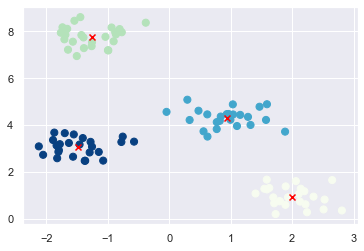

array([[ 2.00454873,  0.9520213 ],
       [-1.26414502,  7.77811813],
       [ 0.93588159,  4.3205638 ],
       [-1.48886624,  3.07731162]])

In [8]:
centroids,clusterassgn,costfunc = kmean(X,4,1000)
plt.scatter(X[:, 0], X[:, 1], s=50,c=clusterassgn, cmap='GnBu');
plt.scatter(centroids[:, 0], centroids[:, 1],color = 'red',marker='x')
plt.show()
centroids

choosing the means/centroids with minimum cost

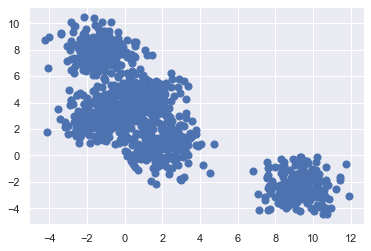

In [9]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=1000, centers=5,random_state=0, cluster_std=1)
plt.scatter(X[:, 0], X[:, 1], s=50, cmap='spring');

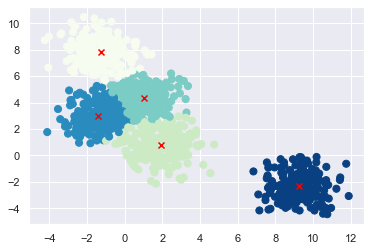

In [10]:
centroids,clusterassgn,costfunc = kmean(X,5,1000)
plt.scatter(X[:, 0], X[:, 1], s=50,c=clusterassgn, cmap='GnBu');
plt.scatter(centroids[:, 0], centroids[:, 1],color = 'red',marker='x')
plt.show()

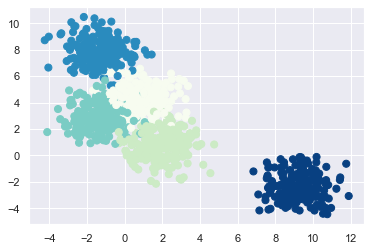

In [11]:
plt.scatter(X[:, 0], X[:, 1], s=50,c=y, cmap='GnBu');
plt.show()

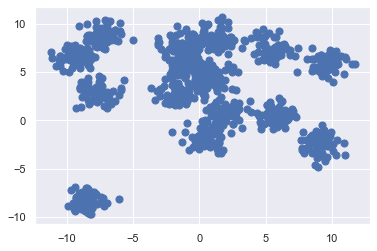

In [12]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=1000, centers=15,random_state=0, cluster_std=0.8)
plt.scatter(X[:, 0], X[:, 1], s=50, cmap='spring');

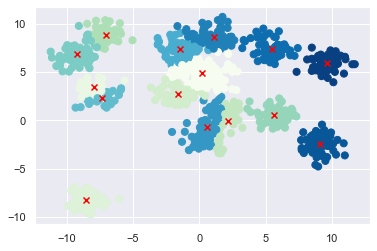

In [13]:
centroids,clusterassgn,costfunc = kmean(X,15,1000)
plt.scatter(X[:, 0], X[:, 1], s=50,c=clusterassgn, cmap='GnBu');
plt.scatter(centroids[:, 0], centroids[:, 1],color = 'red',marker='x')
plt.show()

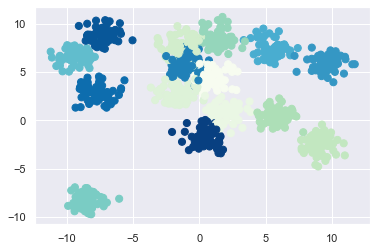

In [14]:
plt.scatter(X[:, 0], X[:, 1], s=50,c=y, cmap='GnBu');
plt.show()

Image compression with K-Means Clustering

In [16]:
image_mat = loadmat("bird_small.mat")
A = image_mat["A"]

image = (A/255).reshape(128*128,3)
K = 16
num_iters = 10
centroids2,cluster,cost=kmean(image, K, num_iters)

In [18]:
m2,n2 = A.shape[0],A.shape[1]
image_recovered = image.copy()
for i in range(K):
    image_recovered[(cluster==i).ravel(),:] = centroids2[i]

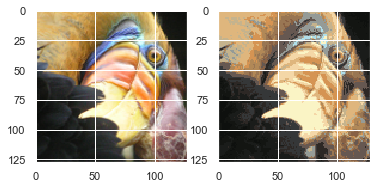

In [19]:
import matplotlib.image as mpimg
fig, ax = plt.subplots(1,2)
ax[0].imshow(image.reshape(128,128,3))
ax[1].imshow(image_recovered.reshape(128,128,3))